In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import glob
from sklearn.linear_model import LinearRegression

In [2]:
pci_dist = 10
holesize = 50

In [3]:
path = "/root/opt/sim_result/p-{}mm/{}mm".format(pci_dist, holesize)
filename = "/output"
filetype = ".csv"

dt = 0.1
D = pci_dist / 1000
dns = 2500
volume = dns * np.pi * D*D*D / 6
under = 0.35

csv_files =glob.glob(path+ filename + "*" + filetype)
#print(csv_files)
print("総ファイル数は" + str(len(csv_files)))

総ファイル数は335


読み込みファイル設定

In [4]:
time_amount = pd.DataFrame(columns=["time","quantity", "mass"])#時間と流出個数
for i in range(0,len(csv_files)-2): #wall and seitei
    openfile = path + filename + str(i).zfill(5) +filetype     
    df = pd.read_csv(openfile, usecols=["Pos.x"," Pos.y"," Pos.z"," velocity"])
    df2 = df[df[" Pos.y"]<under]#under以下の個数カウント
    add = pd.DataFrame([[i*dt, len(df2), len(df2)*volume]], columns = ["time","quantity","mass"])
    time_amount = time_amount.append(add)
    #print(openfile)
    
del(df)
del(df2)
del(add)

ファイル順番に読み込んで処理

In [5]:
print(time_amount)

    time quantity      mass
0    0.0        0  0.000000
0    0.1       22  0.028798
0    0.2       72  0.094248
0    0.3      126  0.164934
0    0.4      183  0.239546
..   ...      ...       ...
0   32.8     6766  8.856673
0   32.9     6766  8.856673
0   33.0     6766  8.856673
0   33.1     6766  8.856673
0   33.2     6766  8.856673

[333 rows x 3 columns]


In [6]:
time_amount = time_amount[time_amount.time<=5]

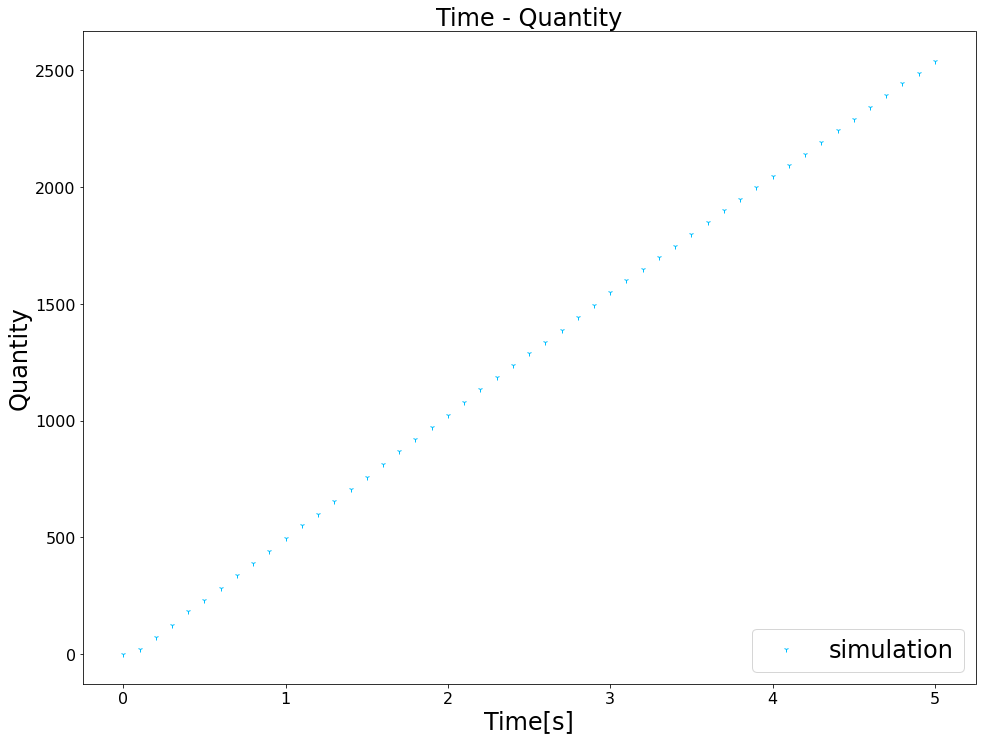

In [7]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
ax.set_title("Time - Quantity",fontsize=24)
ax.set_xlabel("Time[s]",fontsize=24)
ax.set_ylabel("Quantity",fontsize=24)
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)

x = time_amount["time"]
y = time_amount["quantity"]
ax.plot(x,y, '1', color='deepskyblue', label='simulation')

ax.legend(loc='lower right', fontsize=24)

plt.show()

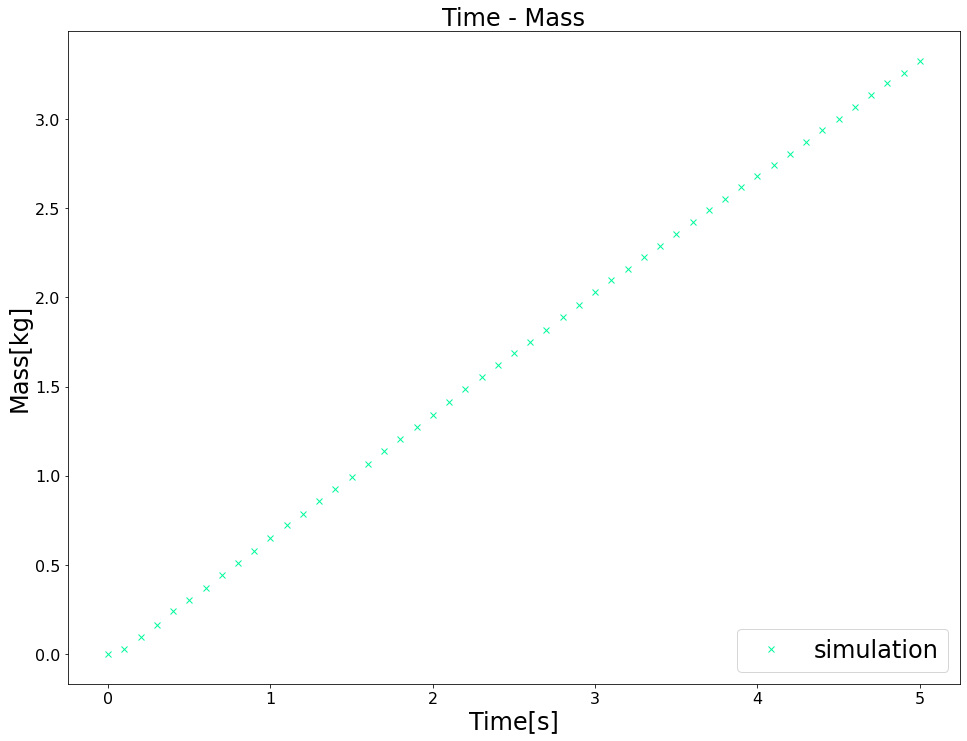

In [8]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
ax.set_title("Time - Mass",fontsize=24)
ax.set_xlabel("Time[s]",fontsize=24)
ax.set_ylabel("Mass[kg]",fontsize=24)
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)

x = time_amount["time"]
y = time_amount["mass"]
ax.plot(x,y, 'x', color='mediumspringgreen', label='simulation')

ax.legend(loc='lower right', fontsize=24)

plt.show()

In [9]:
#fig.savefig(path+"/30mm_Time-Mass.png")

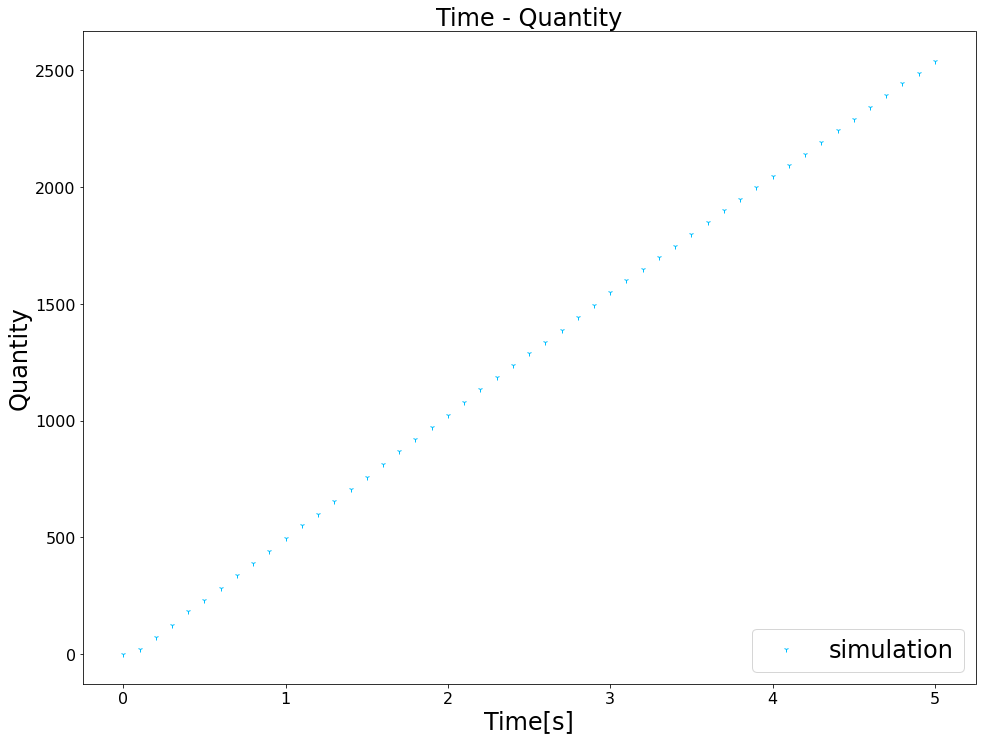

In [10]:
plt.figure(figsize=(16,12))
plt.title("Time - Quantity",fontsize=24)
plt.xlabel("Time[s]",fontsize=24)
plt.ylabel("Quantity",fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

x = time_amount["time"]
y = time_amount["quantity"]
plt.plot(x,y, '1', color='deepskyblue', label='simulation')

plt.legend(loc='lower right', fontsize=24)

sns.set()
plt.show()

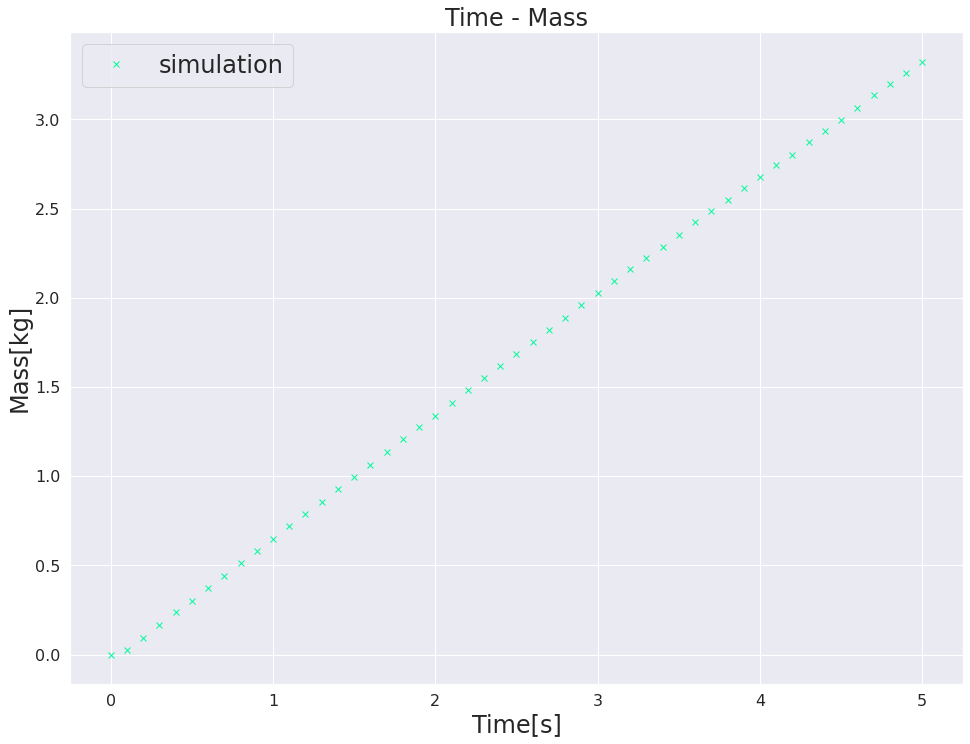

In [11]:
plt.figure(figsize=(16,12))
plt.title("Time - Mass",fontsize=24)
plt.xlabel("Time[s]",fontsize=24)
plt.ylabel("Mass[kg]",fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

x = time_amount["time"]
y = time_amount["mass"]
plt.plot(x,y, 'x', color='mediumspringgreen', label='simulation')

plt.legend(loc='upper left', fontsize=24)

sns.set()
plt.show()

   time quantity      mass
0   2.0     1023  1.339104
0   2.1     1079  1.412408
0   2.2     1135  1.485712
0   2.3     1186  1.552470
0   2.4     1237  1.619229
0   2.5     1289  1.687297
0   2.6     1337  1.750129
0   2.7     1389  1.818197
0   2.8     1443  1.888883
0   2.9     1495  1.956950
0   3.0     1549  2.027636
0   3.1     1601  2.095704
0   3.2     1651  2.161154
0   3.3     1700  2.225295
0   3.4     1747  2.286818
0   3.5     1798  2.353576
0   3.6     1852  2.424262
0   3.7     1900  2.487094
0   3.8     1948  2.549926
0   3.9     1998  2.615376
0   4.0     2046  2.678208
0   4.1     2095  2.742349
0   4.2     2140  2.801253
0   4.3     2193  2.870630
0   4.4     2243  2.936080
0   4.5     2291  2.998912
0   4.6     2342  3.065671
0   4.7     2394  3.133739
0   4.8     2445  3.200498
0   4.9     2489  3.258093
0   5.0     2539  3.323543


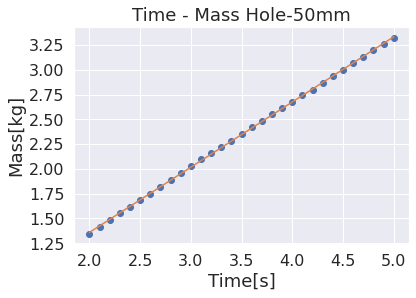

モデル関数の回帰変数 w1: 0.65827
モデル関数の切片 w2: 0.043
y= 0.65827x + 0.043
決定係数 R^2：  0.9998236440187265


In [12]:
time_amount2 = time_amount[20:201]
print(time_amount2)
x = time_amount2[["time"]]
y = time_amount2[["mass"]]

model_lr = LinearRegression()
model_lr.fit(x, y)

plt.title("Time - Mass Hole-{}mm".format(holesize),fontsize=18)
plt.xlabel("Time[s]",fontsize=18)
plt.ylabel("Mass[kg]",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.plot(x, y, 'o')
plt.plot(x, model_lr.predict(x), linestyle="solid")
plt.show()

print('モデル関数の回帰変数 w1: %.5f' %model_lr.coef_)
print('モデル関数の切片 w2: %.3f' %model_lr.intercept_)
print('y= %.5fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('決定係数 R^2： ', model_lr.score(x, y))

In [13]:
path = "D:/experiment/exp_result/e-30mm/30mm-01.csv"
DF = pd.read_csv(path, usecols=["Time","Data"])
DF = DF.dropna()
print(DF)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/experiment/exp_result/e-30mm/30mm-01.csv'

In [ ]:
len(DF[DF.Data==0.0])

In [ ]:
DF = DF[:-1]
DF = DF[(len(DF[DF.Data==0.0]) - 1):]
print(DF)

In [ ]:
DF["Time"] = pd.to_datetime(DF["Time"], format = "%H:%M:%S")
DF = DF.groupby('Time', group_keys=False, as_index=False).apply(lambda x: x.loc[x.Data.idxmin()])
print(DF)

In [ ]:
DF["time"] = 0.0
for i in range(len(DF)):
  DF.time[i:(i+1)]=i-0.27
print(DF)

In [ ]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
ax.set_title("Hole-30mm",fontsize=24)
ax.set_xlabel("Time[s]",fontsize=24)
ax.set_ylabel("Weight[g]",fontsize=24)
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)

x = DF["time"]
y = DF["Data"]
ax.plot(x,y, 's', color='deepskyblue', label='experiment')

X = time_amount["time"]
Y = time_amount["mass"]
plt.plot(X,1000*Y, 'x', color='mediumspringgreen', label='simulation')

ax.legend(loc='lower right', fontsize=24)

plt.show()

In [ ]:
#fig.savefig("D:/experiment/exp_result/e-30mm/time_30mm_s.png")